# 1. Collecting the Data 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import  math 

suv_data = pd.read_csv("datasets_401148_769675_suv_data.csv")
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
#WE have to calculate whether person can actually purschase a SUV or Not

print("# Purchased in original data:"+str(len(suv_data.index)))

# Purchased in original data:400


# 2. Analyzing the Data

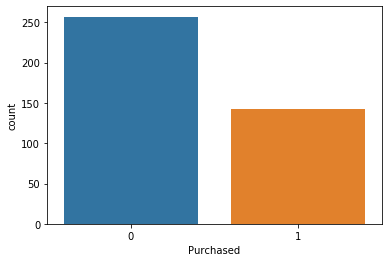

In [6]:
sns.countplot(x="Purchased", data=titanic_data)

# 0.0 did not purchase  
# 1.0 did purchase 

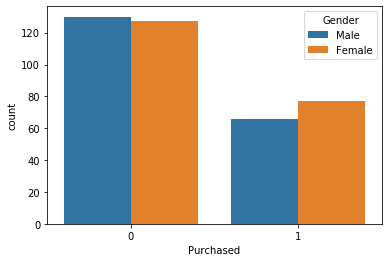

In [7]:
# compare sex 

sns.countplot(x="Purchased", hue="Gender", data=titanic_data)

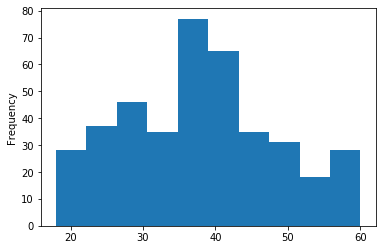

In [10]:
#Distribution AGE

suv_data["Age"].plot.hist()

In [11]:
# What columns are left

suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# 3. Data Wrangling

In [12]:
# What values are null 
# False: it is not null
#True: It is null

suv_data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [13]:
#Missing values 

titanic_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# We do not need to delete or change something so far so good

# 4.Train and Test


 Build the model on the train data and predict the output on the test data 
- Logistic = LogisticRegression()
- logistic.fit(train_X, train_Y)

In [16]:
# Define depedent and independent variable 
# Purchased is the column that we want to predict 

X= suv_data.iloc[:,[2,3]].values     #Independent variable
y= titanic_data.iloc[:,4]            #Dependent variable 

# iloc function is basically an index of panda's data frame is also "Selection by index"

In [18]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [21]:
# Divide dataset into training and testin subset 

from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# I have divided train and test in 75/25

In [23]:
# Scale input values to better performance 

from sklearn.preprocessing import StandardScaler 

In [25]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [26]:
# Import logistic regression 

from sklearn.linear_model import LogisticRegression

In [27]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred=classifier.predict(X_test)

# 5.Accuracy check

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 8, 24]])

In [32]:
accuracy_score(y_test, y_pred)

0.89